In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
bank=pd.read_csv('bank.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5.0,may,1042.0,1,-1.0,0,unknown,yes
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5.0,may,1467.0,1,-1.0,0,unknown,yes
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5.0,may,1389.0,1,-1.0,0,unknown,yes
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5.0,may,579.0,1,-1.0,0,unknown,yes
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5.0,may,673.0,2,-1.0,0,unknown,yes


In [5]:
bank.shape

(10861, 17)

In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10861 entries, 0 to 10860
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        10861 non-null  int64  
 1   job        10846 non-null  object 
 2   marital    10861 non-null  object 
 3   education  10852 non-null  object 
 4   default    10861 non-null  object 
 5   balance    10855 non-null  float64
 6   housing    10861 non-null  object 
 7   loan       10858 non-null  object 
 8   contact    10850 non-null  object 
 9   day        10860 non-null  float64
 10  month      10861 non-null  object 
 11  duration   10841 non-null  float64
 12  campaign   10861 non-null  int64  
 13  pdays      10842 non-null  float64
 14  previous   10861 non-null  int64  
 15  poutcome   10861 non-null  object 
 16  y          10861 non-null  object 
dtypes: float64(4), int64(3), object(10)
memory usage: 1.4+ MB


In [7]:
bank.default.unique()

array(['no', 'yes'], dtype=object)

In [8]:
bank.drop('default',axis=1,inplace=True)

In [9]:
bank.campaign.unique()

array([ 1,  2,  3,  4,  5,  6, 32,  8, 11,  7,  9, 10, 15, 12, 14, 17, 13,
       24, 29, 16, 21, 20, 19, 18, 22, 25, 43, 51, 63, 41, 26, 28, 55, 50,
       38, 23])

In [10]:
bank.previous.unique()

array([ 0,  1,  4,  3,  2,  6, 10,  7,  9,  5, 29, 13, 17,  8, 11, 30, 22,
       58, 21, 14, 26, 12, 19, 55, 23, 15, 20])

In [11]:
bank.poutcome.unique()

array(['unknown', 'other', 'failure', 'success'], dtype=object)

In [12]:
bank.y.unique()

array(['yes', 'no'], dtype=object)

In [13]:
bank.job.unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'unemployed', 'blue-collar', 'entrepreneur', 'housemaid',
       'self-employed', 'unknown', nan, 'student'], dtype=object)

In [14]:
bank.education.unique()

array(['secondary', 'tertiary', 'unknown', nan, 'primary'], dtype=object)

In [15]:
bank.balance.unique()

array([2343.,   45., 1270., ..., 1874., 4178., 2147.])

In [16]:
bank.loan.unique()

array(['no', 'yes', nan], dtype=object)

In [17]:
bank.contact.unique()

array(['unknown', nan, 'cellular', 'telephone'], dtype=object)

In [18]:
bank.duration.unique()

array([1042., 1467., 1389., ..., 1611., 1185., 2260.])

In [19]:
bank.pdays.unique()

array([ -1.,  nan, 166.,  91., 143., 147., 170., 104., 150., 171., 126.,
       182., 127., 110., 168., 100., 198., 174., 175., 195., 111.,  27.,
       128., 177., 167., 122., 183., 133., 178.,  34.,  10., 163., 135.,
       184., 154.,  99.,  93., 253.,   2., 242., 272., 208.,  73.,  76.,
       269., 160.,  90., 196., 189., 246., 238., 203., 268., 267., 251.,
        92., 262.,   9.,  88.,  85., 243., 210., 200., 257., 264., 101.,
       261., 102., 270., 107., 106., 199., 112.,  41., 294., 121., 231.,
       130., 239., 302., 307., 222., 138., 323., 141., 320., 316., 140.,
       315., 256., 146., 328.,  74., 148., 327., 341., 330., 145., 266.,
       234., 345., 318., 305., 325., 274., 343.,  57., 260., 329., 344.,
       254., 180., 340.,  82., 181., 278., 153.,  81.,   4., 349., 334.,
        87., 176.,  86., 169.,  83.,  79.,   6., 259.,  13., 161., 350.,
        84.,  80., 164., 162.,  22., 296.,  66., 263., 333.,  17.,  89.,
       319.,  78., 286., 337., 364., 188., 258., 35

In [20]:
bank.day.unique()

array([ 5.,  6., nan,  7.,  8.,  9., 12., 13., 14., 15., 16., 19., 20.,
       21., 23., 26., 27., 28., 29., 30.,  2.,  3.,  4., 11., 17., 18.,
       24.,  1., 10., 22., 25., 31.])

In [21]:
bank.isnull().sum()

,0
age,0
job,15
marital,0
education,9
balance,6
housing,0
loan,3
contact,11
day,1
month,0


In [22]:
bank['job'] = bank['job'].fillna(bank['job'].mode()[0])
bank['education'] = bank['education'].fillna(bank['education'].mode()[0])
bank['loan'] = bank['loan'].fillna(bank['loan'].mode()[0])
bank['contact'] = bank['contact'].fillna(bank['contact'].mode()[0])
bank['duration'] = bank['duration'].fillna(bank['duration'].mode()[0])
bank['day']=bank['day'].fillna(bank['day'].mode()[0])

In [23]:
bank.isnull().sum()

,0
age,0
job,0
marital,0
education,0
balance,6
housing,0
loan,0
contact,0
day,0
month,0


<Axes: xlabel='balance', ylabel='Count'>

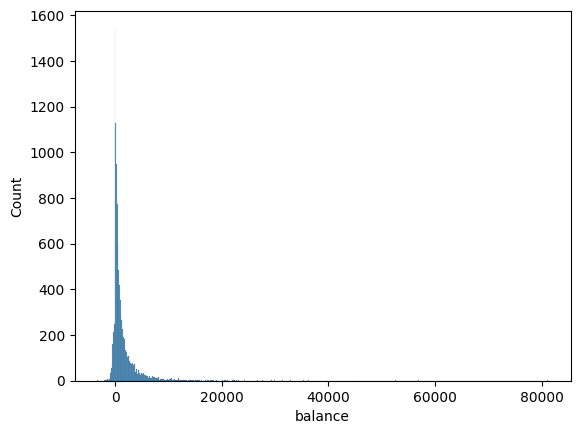

In [24]:
sns.histplot(bank['balance'])

<Axes: xlabel='pdays', ylabel='Count'>

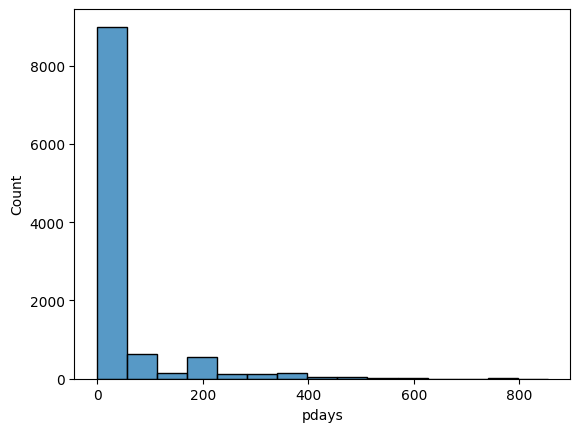

In [25]:
sns.histplot(bank['pdays'])

In [26]:
bank['balance']=bank['balance'].fillna(bank['balance'].median())
bank['pdays']=bank['pdays'].fillna(bank['pdays'].median())

In [27]:
bank.isnull().sum()

,0
age,0
job,0
marital,0
education,0
balance,0
housing,0
loan,0
contact,0
day,0
month,0


In [28]:
bank['job'] = bank['job'].str.replace('.', '')

In [29]:
bank.head(5)

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,admin,married,secondary,2343.0,yes,no,unknown,5.0,may,1042.0,1,-1.0,0,unknown,yes
1,56,admin,married,secondary,45.0,no,no,unknown,5.0,may,1467.0,1,-1.0,0,unknown,yes
2,41,technician,married,secondary,1270.0,yes,no,unknown,5.0,may,1389.0,1,-1.0,0,unknown,yes
3,55,services,married,secondary,2476.0,yes,no,unknown,5.0,may,579.0,1,-1.0,0,unknown,yes
4,54,admin,married,tertiary,184.0,no,no,unknown,5.0,may,673.0,2,-1.0,0,unknown,yes


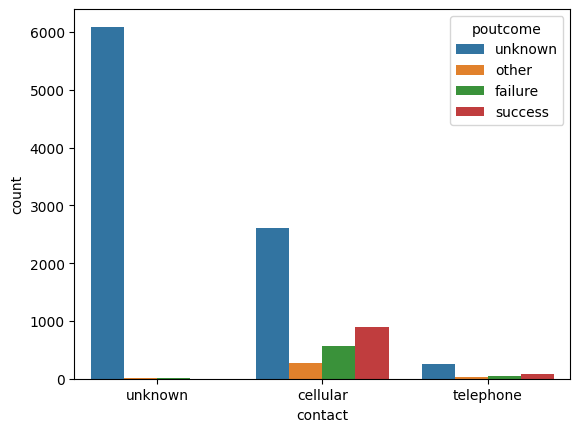

In [30]:
sns.countplot(x='contact', hue='poutcome', data=bank)
plt.show()


<Axes: xlabel='housing', ylabel='count'>

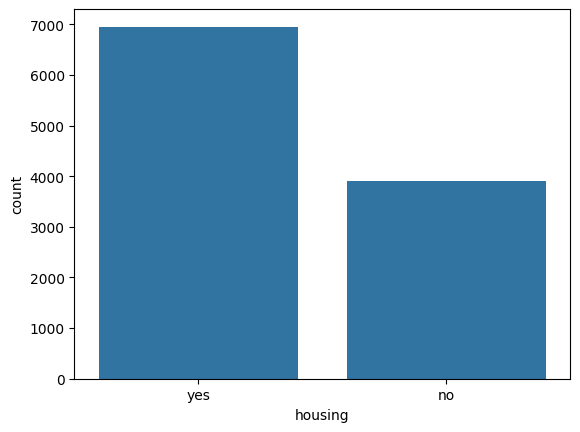

In [31]:
sns.countplot(x='housing',data=bank)

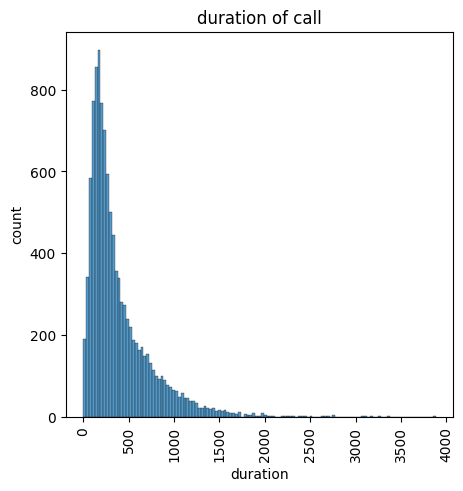

In [32]:
plt.figure(figsize=(5,5))
sns.histplot(bank['duration'])
plt.xticks(rotation=90)
plt.title('duration of call')
plt.xlabel('duration')
plt.ylabel('count')
plt.show()

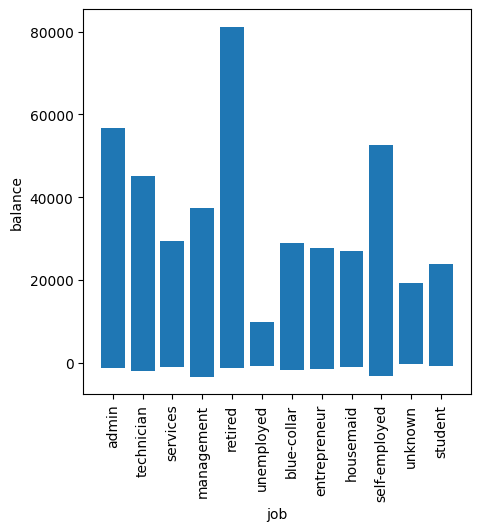

In [33]:
plt.figure(figsize=(5,5))
plt.bar(bank['job'],bank['balance'])
plt.xticks(rotation=90)
plt.xlabel('job')
plt.ylabel('balance')
plt.show()

In [34]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10861.000000,10861.000000,10861.000000,10861.000000,10861.000000,10861.000000,10861.000000
mean,40.323727,1457.230642,17.887671,385.862075,2.442593,32.943375,0.569929
std,11.969443,3076.703000,7.846003,345.214997,2.662568,89.937027,1.875257
min,18.000000,-3372.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,107.000000,13.000000,157.000000,1.000000,-1.000000,0.000000
50%,38.000000,524.000000,18.000000,268.000000,2.000000,-1.000000,0.000000
75%,47.000000,1633.000000,26.000000,507.000000,3.000000,-1.000000,0.000000
max,334.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


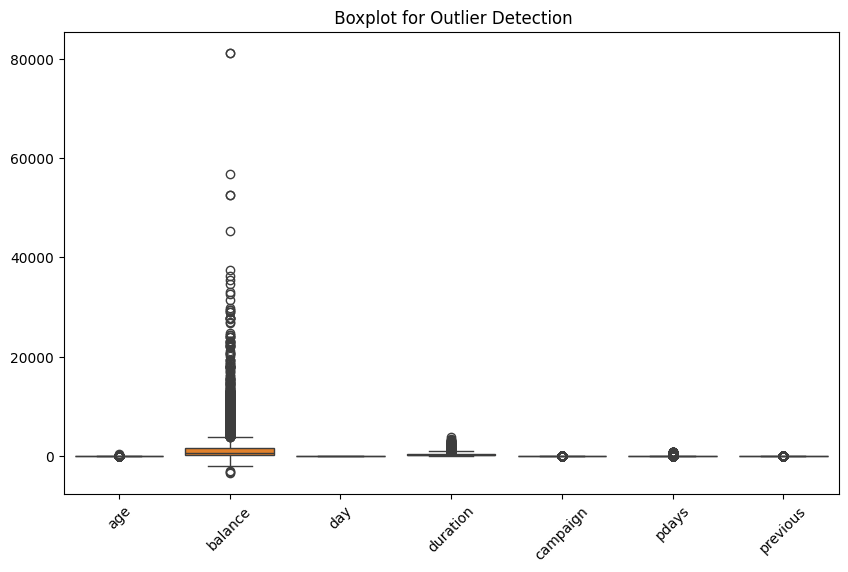

In [35]:

numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

plt.figure(figsize=(10, 6))
sns.boxplot(data=bank[numerical_cols], orient='v')
plt.title(' Boxplot for Outlier Detection')
plt.xticks(rotation=45)
plt.show()


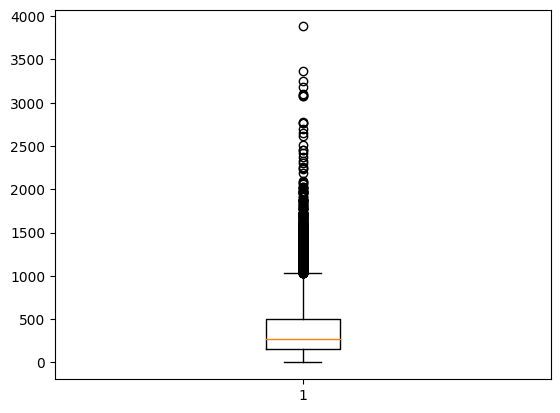

In [36]:
plt.boxplot(bank['duration'])
plt.show()

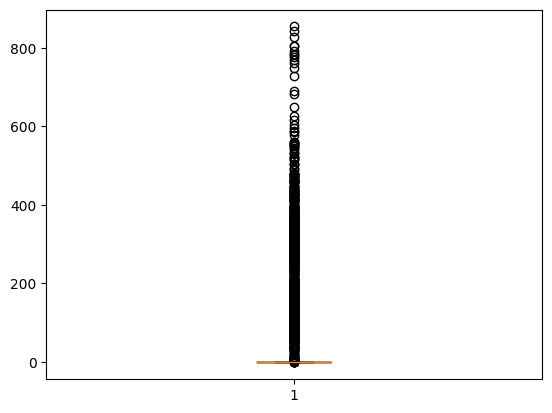

In [37]:
plt.boxplot(bank['pdays'])
plt.show()

In [38]:

Q1 = bank['balance'].quantile(0.25)
Q3 = bank['balance'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with IQR
bank['balance'] = np.where((bank['balance'] < lower_bound) | (bank['balance'] > upper_bound),
                             IQR, bank['balance'])


In [39]:

Q1 = bank['duration'].quantile(0.25)
Q3 = bank['duration'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with IQR
bank['duration'] = np.where((bank['duration'] < lower_bound) | (bank['duration'] > upper_bound),
                             IQR, bank['duration'])

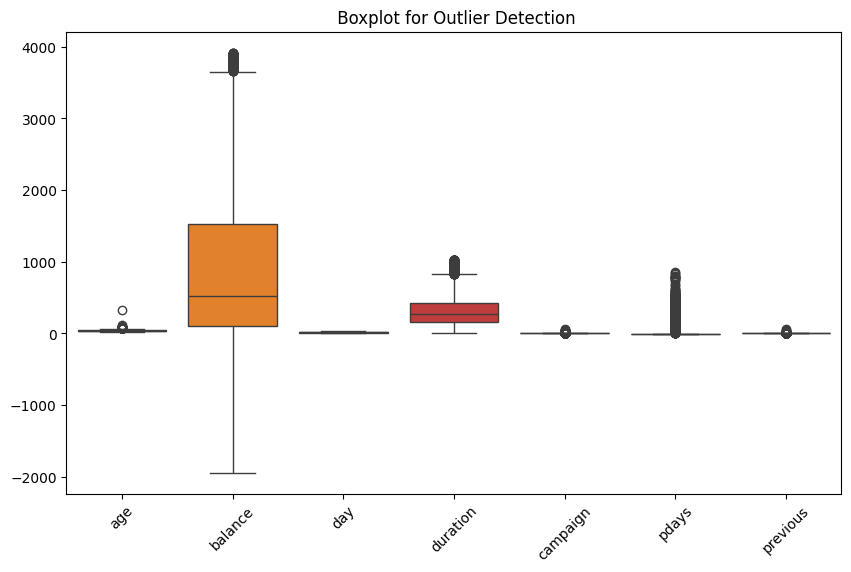

In [40]:
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
plt.figure(figsize=(10, 6))
sns.boxplot(data=bank[numerical_cols], orient='v')
plt.title(' Boxplot for Outlier Detection')
plt.xticks(rotation=45)
plt.show()

In [41]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10861.000000,10861.000000,10861.000000,10861.000000,10861.000000,10861.000000,10861.000000
mean,40.323727,834.510174,17.887671,326.780591,2.442593,32.943375,0.569929
std,11.969443,953.285933,7.846003,227.099908,2.662568,89.937027,1.875257
min,18.000000,-1944.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,107.000000,13.000000,157.000000,1.000000,-1.000000,0.000000
50%,38.000000,524.000000,18.000000,268.000000,2.000000,-1.000000,0.000000
75%,47.000000,1526.000000,26.000000,428.000000,3.000000,-1.000000,0.000000
max,334.000000,3917.000000,31.000000,1032.000000,63.000000,854.000000,58.000000


In [42]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10861 entries, 0 to 10860
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        10861 non-null  int64  
 1   job        10861 non-null  object 
 2   marital    10861 non-null  object 
 3   education  10861 non-null  object 
 4   balance    10861 non-null  float64
 5   housing    10861 non-null  object 
 6   loan       10861 non-null  object 
 7   contact    10861 non-null  object 
 8   day        10861 non-null  float64
 9   month      10861 non-null  object 
 10  duration   10861 non-null  float64
 11  campaign   10861 non-null  int64  
 12  pdays      10861 non-null  float64
 13  previous   10861 non-null  int64  
 14  poutcome   10861 non-null  object 
 15  y          10861 non-null  object 
dtypes: float64(4), int64(3), object(9)
memory usage: 1.3+ MB


In [43]:
bank.drop(['marital','education'],axis=1,inplace=True)

In [44]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10861 entries, 0 to 10860
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       10861 non-null  int64  
 1   job       10861 non-null  object 
 2   balance   10861 non-null  float64
 3   housing   10861 non-null  object 
 4   loan      10861 non-null  object 
 5   contact   10861 non-null  object 
 6   day       10861 non-null  float64
 7   month     10861 non-null  object 
 8   duration  10861 non-null  float64
 9   campaign  10861 non-null  int64  
 10  pdays     10861 non-null  float64
 11  previous  10861 non-null  int64  
 12  poutcome  10861 non-null  object 
 13  y         10861 non-null  object 
dtypes: float64(4), int64(3), object(7)
memory usage: 1.2+ MB


In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
bank['job'] = le.fit_transform(bank['job'])


In [46]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10861 entries, 0 to 10860
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       10861 non-null  int64  
 1   job       10861 non-null  int64  
 2   balance   10861 non-null  float64
 3   housing   10861 non-null  object 
 4   loan      10861 non-null  object 
 5   contact   10861 non-null  object 
 6   day       10861 non-null  float64
 7   month     10861 non-null  object 
 8   duration  10861 non-null  float64
 9   campaign  10861 non-null  int64  
 10  pdays     10861 non-null  float64
 11  previous  10861 non-null  int64  
 12  poutcome  10861 non-null  object 
 13  y         10861 non-null  object 
dtypes: float64(4), int64(4), object(6)
memory usage: 1.2+ MB


In [47]:
bank['housing']=le.fit_transform(bank['housing'])
bank['loan']=le.fit_transform(bank['loan'])
bank['contact']=le.fit_transform(bank['contact'])

In [48]:
bank.poutcome.unique()

array(['unknown', 'other', 'failure', 'success'], dtype=object)

In [49]:
poutcome_mapping = {'unknown': 0, 'other': 1, 'failure': 2, 'success': 3}
bank['poutcome'] = bank['poutcome'].map(poutcome_mapping)

In [50]:
bank.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [51]:
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,'may':5,'jun': 6,'jul': 7,'aug': 8,'sep': 9,'oct': 10,'nov': 11,'dec': 12}
bank['month'] = bank['month'].map(month_mapping)

In [52]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10861 entries, 0 to 10860
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       10861 non-null  int64  
 1   job       10861 non-null  int64  
 2   balance   10861 non-null  float64
 3   housing   10861 non-null  int64  
 4   loan      10861 non-null  int64  
 5   contact   10861 non-null  int64  
 6   day       10861 non-null  float64
 7   month     10861 non-null  int64  
 8   duration  10861 non-null  float64
 9   campaign  10861 non-null  int64  
 10  pdays     10861 non-null  float64
 11  previous  10861 non-null  int64  
 12  poutcome  10861 non-null  int64  
 13  y         10861 non-null  object 
dtypes: float64(4), int64(9), object(1)
memory usage: 1.2+ MB


In [53]:
bank['y']=le.fit_transform(bank['y'])

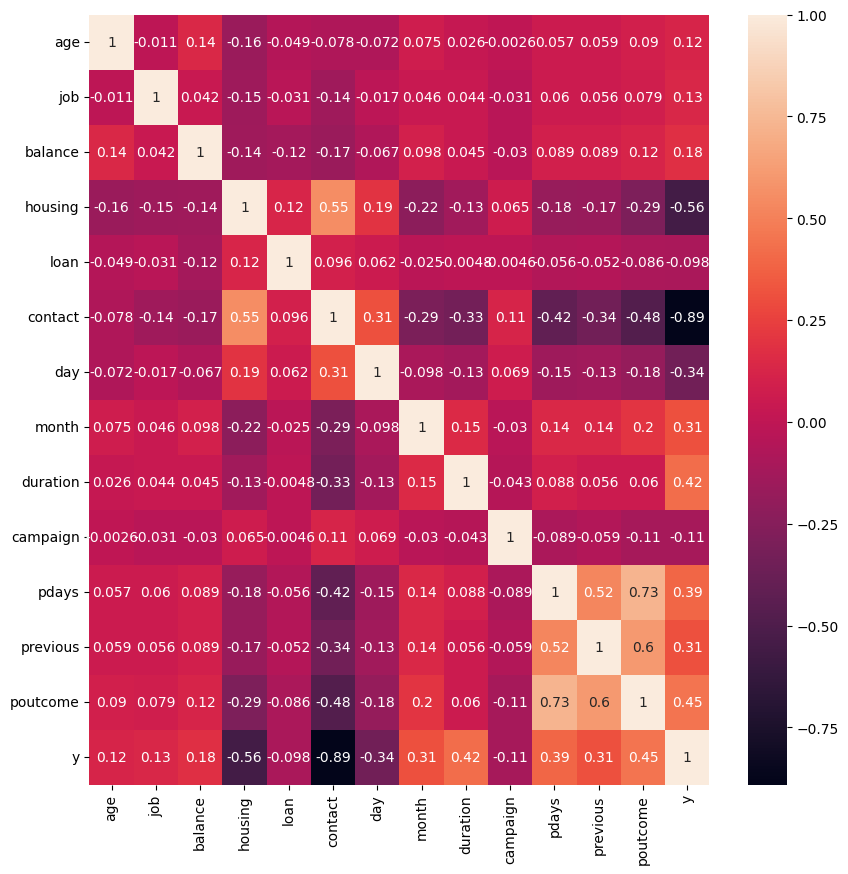

In [54]:
plt.figure(figsize=(10,10))
sns.heatmap(bank.corr(),annot=True)
plt.show()

In [55]:
x=bank.drop('y',axis=1)
y=bank['y']

In [56]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)


In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [58]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)


In [59]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy)
print("Classification report\n",classification_report(y_test, y_pred_lr))
print("Confusion matrix\n",confusion_matrix(y_test, y_pred_lr))

Accuracy: 0.9668660837551771
Classification report
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1119
           1       0.99      0.94      0.97      1054

    accuracy                           0.97      2173
   macro avg       0.97      0.97      0.97      2173
weighted avg       0.97      0.97      0.97      2173

Confusion matrix
 [[1107   12]
 [  60  994]]


In [60]:

from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score: 0.9729518573946987


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [61]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(x_test)


In [62]:
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Accuracy (best model):", accuracy_best)
print("Classification report (best model)\n", classification_report(y_test, y_pred_best))
print("Confusion matrix (best model)\n", confusion_matrix(y_test, y_pred_best))

Accuracy (best model): 0.975609756097561
Classification report (best model)
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1119
           1       0.99      0.96      0.97      1054

    accuracy                           0.98      2173
   macro avg       0.98      0.98      0.98      2173
weighted avg       0.98      0.98      0.98      2173

Confusion matrix (best model)
 [[1108   11]
 [  42 1012]]


In [63]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(x_train, y_train)
y_pred_dtc = dtc.predict(x_test)

In [64]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy = accuracy_score(y_test, y_pred_dtc)
print("Accuracy:", accuracy)
print("Classification report\n",classification_report(y_test, y_pred_dtc))
print("Confusion matrix\n",confusion_matrix(y_test, y_pred_dtc))

Accuracy: 0.9765301426599171
Classification report
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1119
           1       0.97      0.98      0.98      1054

    accuracy                           0.98      2173
   macro avg       0.98      0.98      0.98      2173
weighted avg       0.98      0.98      0.98      2173

Confusion matrix
 [[1088   31]
 [  20 1034]]


In [65]:
parametre_grid = {
    'criterion': ['entropy'],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=parametre_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)



Best hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best cross-validation score: 0.9799727450937524


In [66]:
best_dtc = grid_search.best_estimator_
y_pred_best_dtc = best_dtc.predict(x_test)

accuracy_best = accuracy_score(y_test, y_pred_best_dtc)
print("Accuracy (best model):", accuracy_best)
print("Classification report (best model)\n", classification_report(y_test, y_pred_best_dtc))
print("Confusion matrix (best model)\n", confusion_matrix(y_test, y_pred_best_dtc))


Accuracy (best model): 0.9829728485964105
Classification report (best model)
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1119
           1       0.99      0.97      0.98      1054

    accuracy                           0.98      2173
   macro avg       0.98      0.98      0.98      2173
weighted avg       0.98      0.98      0.98      2173

Confusion matrix (best model)
 [[1113    6]
 [  31 1023]]


In [67]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)
rfc = rfc.fit(x_train,y_train)
y_pred_rfc = rfc.predict(x_test)


In [68]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy = accuracy_score(y_test, y_pred_rfc)
print("Accuracy:", accuracy)
print("Classification report\n",classification_report(y_test, y_pred_rfc))
print("Confusion matrix\n",confusion_matrix(y_test, y_pred_rfc))

Accuracy: 0.9861942015646572
Classification report
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1119
           1       1.00      0.97      0.99      1054

    accuracy                           0.99      2173
   macro avg       0.99      0.99      0.99      2173
weighted avg       0.99      0.99      0.99      2173

Confusion matrix
 [[1117    2]
 [  28 1026]]


In [69]:
from sklearn.svm import SVC
svm=SVC(kernel='linear')
svm.fit(x_train,y_train)
y_pred_svm=svm.predict(x_test)

In [70]:
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy (SVM):", accuracy)
print("Classification report (SVM)\n", classification_report(y_test, y_pred_svm))
print("Confusion matrix (SVM)\n", confusion_matrix(y_test, y_pred_svm))

Accuracy (SVM): 0.9774505292222734
Classification report (SVM)
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1119
           1       1.00      0.95      0.98      1054

    accuracy                           0.98      2173
   macro avg       0.98      0.98      0.98      2173
weighted avg       0.98      0.98      0.98      2173

Confusion matrix (SVM)
 [[1119    0]
 [  49 1005]]


In [71]:
#param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
#grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5, scoring='accuracy')
#grid_search.fit(x_train, y_train)
#print("Best hyperparameters (SVM):", grid_search.best_params_)
#print("Best cross-validation score (SVM):", grid_search.best_score_)

In [72]:
#best_svm = grid_search.best_estimator_
#y_pred_best_svm = best_svm.predict(x_test)

In [73]:
#accuracy_best = accuracy_score(y_test, y_pred_best_svm)
#print("Accuracy (best SVM):", accuracy_best)
#print("Classification report (best SVM)\n", classification_report(y_test, y_pred_best_svm))
#print("Confusion matrix (best SVM)\n", confusion_matrix(y_test, y_pred_best_svm))

In [74]:

results = {
    'Model': ['Logistic Regression', 'Logistic Regression (Hyperparameter tunned)', 'Decision Tree', 'Random Forest', 'SVM'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr), accuracy_best, accuracy_score(y_test, y_pred_dtc),
                 accuracy_score(y_test, y_pred_rfc), accuracy_score(y_test, y_pred_svm)]
}

results_df = pd.DataFrame(results)
print(results_df)


                                         Model  Accuracy
0                          Logistic Regression  0.966866
1  Logistic Regression (Hyperparameter tunned)  0.982973
2                                Decision Tree  0.976530
3                                Random Forest  0.986194
4                                          SVM  0.977451


In [75]:
bank.columns

Index(['age', 'job', 'balance', 'housing', 'loan', 'contact', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [76]:
bank.head()

,age,job,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,0,2343.0,1,0,2,5.0,5,350.0,1,-1.0,0,0,1
1,56,0,45.0,0,0,2,5.0,5,350.0,1,-1.0,0,0,1
2,41,9,1270.0,1,0,2,5.0,5,350.0,1,-1.0,0,0,1
3,55,7,2476.0,1,0,2,5.0,5,579.0,1,-1.0,0,0,1
4,54,0,184.0,0,0,2,5.0,5,673.0,2,-1.0,0,0,1


In [79]:
new_data = pd.DataFrame({
    'age': [35],  # Wrap each value in a list
    'job': [9],
    'balance': [23458],
    'housing': [0],
    'loan': [0],
    'contact': [1],
    'day': [3],
    'month': [8],
    'duration': [159],
    'campaign': [1],
    'pdays': [50],
    'previous': [1],
    'poutcome': [1]
})


new_data_scaled = scaler.transform(new_data)
prediction = rfc.predict(new_data_scaled)
prediction_label = ['no' if pred == 0 else 'yes' for pred in prediction]
print("Prediction:", prediction_label)


Prediction: ['yes']
Prediction: [1]
